# Individual assignment


### About
The objective of this project is to classify whether someone has diabetes or not with the help of SVM and ensemble method.


Dataset consists of several Medical Variables(Independent) and one Outcome Variable(Dependent)
The independent variables in this data set are :-'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'

Importing the required libraries

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import time

In [5]:
#reads the input file 'Diabetes.csv' using Pandas
data = pd.read_csv('diabetes.csv')
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### About the dataset
* Pregnancies :- Number of times a woman has been pregnant
* Glucose :- Plasma Glucose concentration of 2 hours in an oral glucose tolerance test
* BloodPressure :- Diastollic Blood Pressure (mm hg)
* SkinThickness :- Triceps skin fold thickness(mm)
* Insulin :- 2 hour serum insulin(mu U/ml)
* BMI :- Body Mass Index ((weight in kg/height in m)^2)
* Age :- Age(years)
* DiabetesPedigreeFunction :-scores likelihood of diabetes based on family history)
* Outcome :- 0(doesn't have diabetes) or 1 (has diabetes)


### Loading data

Prints the first 5 rows

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Checks if the dataframe has null values

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#check the dimensions of the dataset
data.shape

(768, 9)

### Final check / summary of the data
Helps us to understand how data has been spread across the table.
* count :- the number of Non-empty rows in a feature.
* mean :- mean value of that feature.
* std :- Standard Deviation Value of that feature.
* min :- minimum value of that feature.
* max :- maximum value of that feature.
* 25%, 50%, and 75% are the percentile/quartile of each features.

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Splits data for better computation and understanding

In [10]:
data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

Checks the distribution of the dependant variable and plot it using seaborn library.
Where 0 gives the outcome of 500 (Non- diabetic)
and 1 gives the outcome of 268 (Diabetic)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

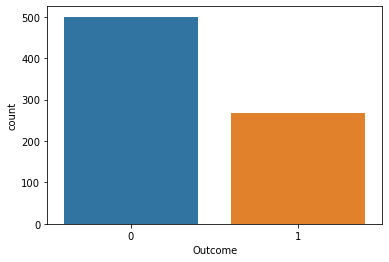

In [11]:
sns.countplot('Outcome',data=data)

The plot here shows the difference between Diabetic and Non-diabetic patients where Non-diabetic patients(0) are more comparatively. 

### Mean Value for Diabetic and Non- diabetic

In [12]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [13]:
#separating the data and labels
X= data.drop(columns='Outcome', axis=1)
Y= data['Outcome']
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


### Checking information of the dataset
A concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Feature selection
Reducing the size of dataset is important as the size and variety of dataset grows progessively and continously. Our aim to use feature selection is to improve performance of a predictive model and reduce computational cost.

Pearson's correlation Coefficient aids in finding the relationship between two quantities. It gives the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 meaning that they are highly correlated and 0 means no correlation.

Rearranging the appearance for better reading

In [15]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.**


<AxesSubplot:title={'center':'Pearson Corrrelation of features'}>

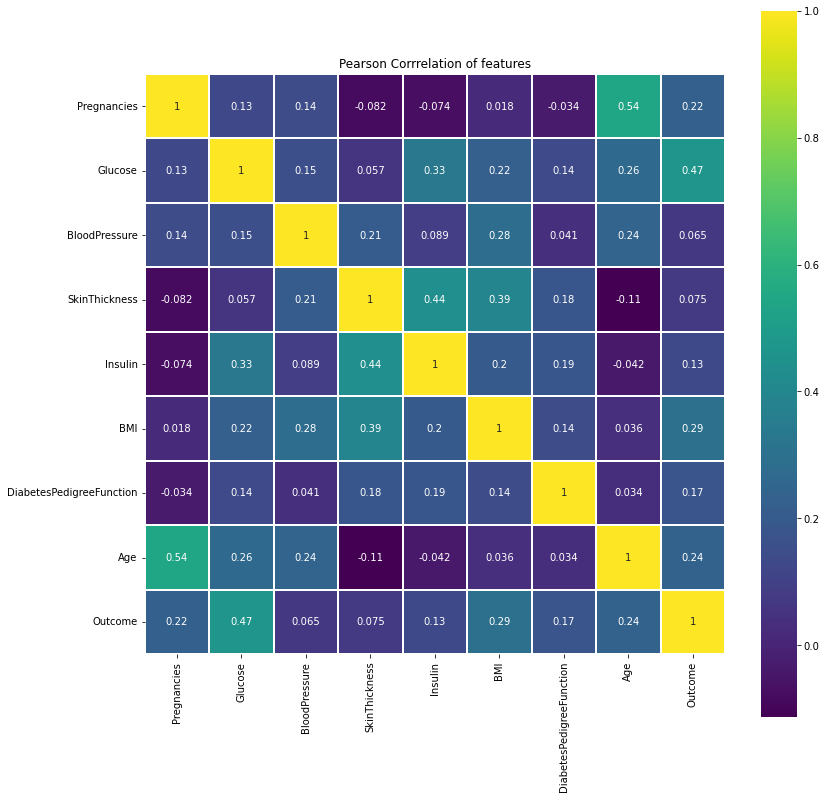

In [16]:
#Plot a heatmap with different features and their levels/values
colormap = plt.cm.viridis
plt.figure(figsize=(13,13))
plt.title("Pearson Corrrelation of features")
sns.heatmap(data.corr(), cmap=colormap, annot=True, linewidths=0.3, vmax=1.0, 
            square=True, linecolor='white')

**The darker the color, the lesser the value**

Time taken:  3.09375 seconds


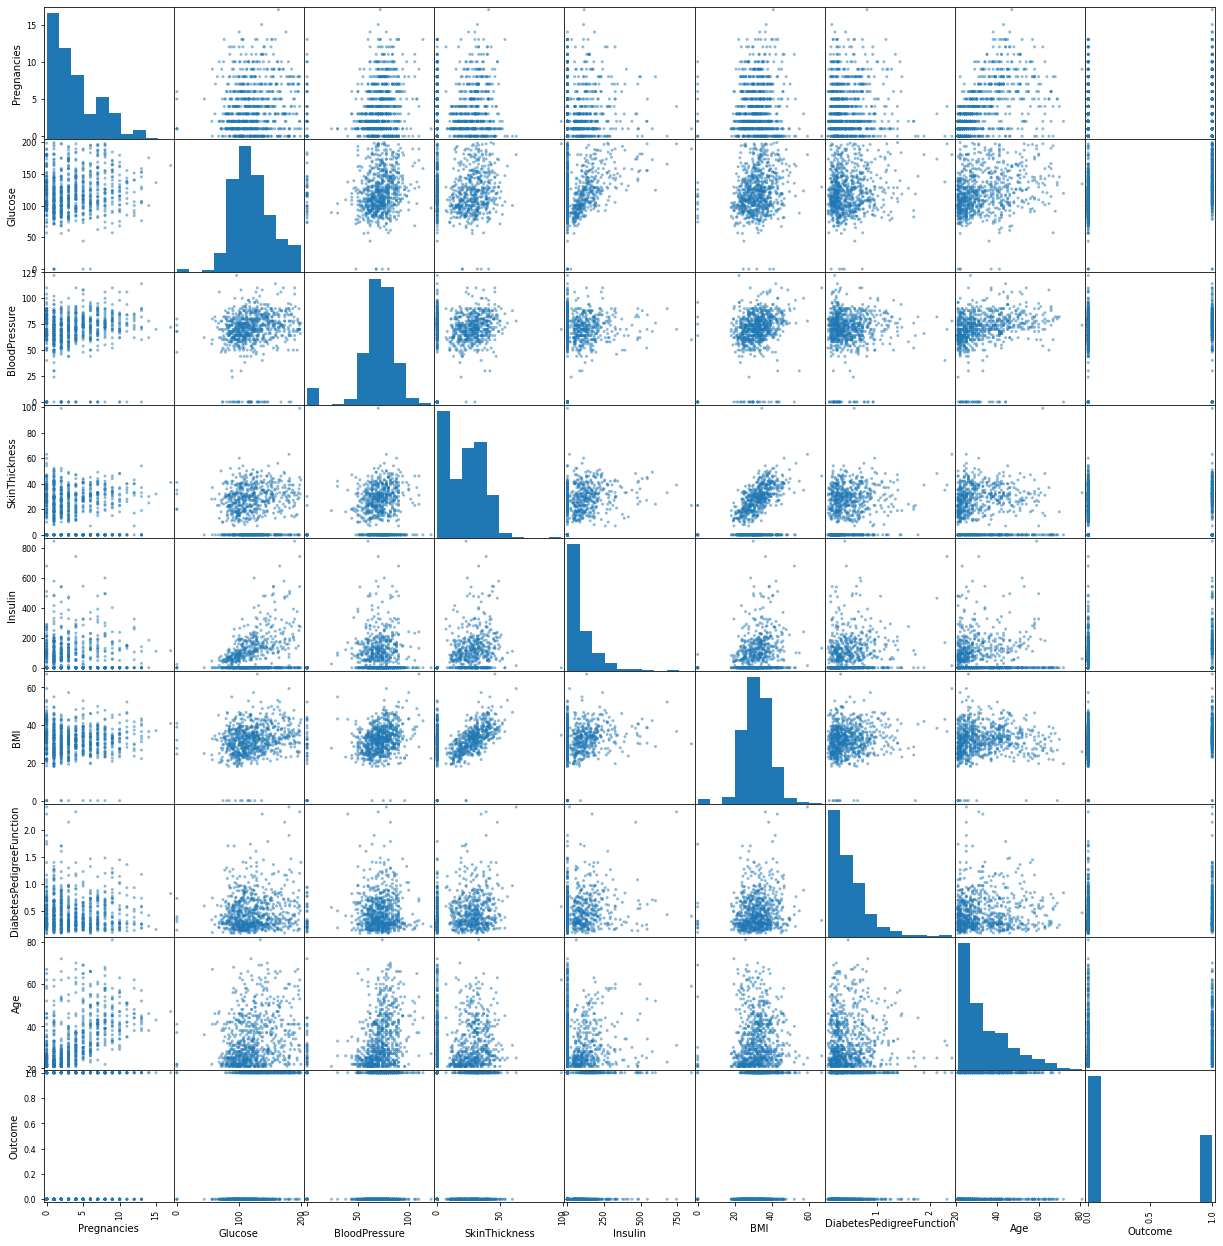

In [17]:
start= time.process_time()
matrix = pd.plotting.scatter_matrix(data, figsize=(21,22), diagonal='hist' )
print("Time taken: ",time.process_time()-start,"seconds")

The diagonal shows the distribution of mean, std, mini ,max etc given as the the data.
The other cell of the plot matrix, we have the scatter plot i.e. correlation plot of each variable combination of the dataframe. for example the middle graphic in the first row we can see the correlation between pregnancy and glucose, similarly the 3rd graph in the first row shows the correlation between pregancy and Bloodpressure.

***Here we can come to various conclusion looking at these plots for example  it is observed the 5th plot in pregnancies with insulin, it can be conclude that women with higher number of pregnancies have lower insulin.***




***Scaling*** the data points using MinMaxScaler
to fit inconsistant data with the standard scalar function and transforming data into a common range.

## Train-Test split
Split the dataset with stratify sampling on Outcome variable to maintain the distribution of dependent variable


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'Outcome'], data['Outcome'], stratify=data['Outcome'], random_state=11)

In [21]:
X_train.shape

(576, 8)

In [22]:
X_test.shape

(192, 8)

***Scaling*** the data points using MinMaxScaler
to fit inconsistant data with the standard scalar function and transforming data into a common range.

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)
scaled_X_train
scaled_X_test

array([[0.26666667, 0.73366834, 0.75409836, ..., 0.52525253, 0.19443255,
        0.78431373],
       [0.53333333, 0.42211055, 0.60655738, ..., 0.64478114, 0.15931478,
        0.35294118],
       [0.06666667, 0.50251256, 0.54098361, ..., 0.53872054, 0.15374732,
        0.41176471],
       ...,
       [0.46666667, 0.98492462, 0.73770492, ..., 0.67003367, 0.15674518,
        0.39215686],
       [0.73333333, 0.51758794, 0.55737705, ..., 0.77777778, 0.01755889,
        0.41176471],
       [0.66666667, 0.47236181, 0.59016393, ..., 0.38888889, 0.21841542,
        0.68627451]])

Due to overfitting the test accuracy is very less as compared to the training accuracy.


**Support Vector Machines (SVM)** requires all the features to be on a similar scale. We will need to rescale our data that all the features are approximately on the same scale and than see the performance.





## 1. ENSEMBLE METHOD
### Bagging

Bagging is called as bootstrap aggrigating, is the aggrigation of multiple versions of a predicted model where each model is trained individually.

Some applications of bagging are:
* Fraud detection
* Land cover mapping
* Banking sector 


### Algorithm 
Boostrapping compromises the first step in bagging process flow where the data is divided into randomized samples then fit another algoritm i.e. Decision Tree to each of these samples.

In [24]:
from sklearn.tree import DecisionTreeClassifier
#relativilry imbalance classifier, it can overfit, and it might generte high variance model.
from sklearn.model_selection import cross_val_score

scores=cross_val_score(DecisionTreeClassifier(), X_train , y_train ,cv=5)
scores
 

array([0.77586207, 0.7826087 , 0.69565217, 0.71304348, 0.6173913 ])

In [26]:
#Taking out the mean value
scores.mean()

0.716911544227886

**Parameters used**

* base_estimator: The algorithm to be used on all the random subsets of the dataset. Default value is a decision tree.

* n_estimators: The number of base estimators in the ensemble. Default value is 10.

* random_state: The seed used by the random state generator. Default value is None.

* oob.score: Out Of Bag, a way of validating the random forest model

In [32]:
#Loading classifier
from sklearn.ensemble import BaggingClassifier
bag_model= BaggingClassifier(
    base_estimator= DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.5,
    oob_score= True,
    random_state=0
)
bag_model.fit(X_train, y_train)


bag_model.oob_score_


0.7690972222222222

In [33]:
bag_model.score(X_test, y_test)

0.7916666666666666

In [31]:
#Model prediction for each instance of the test.
bag_predict=bag_model.predict(X_test)
bag_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

Classification Report is:
 [[110  15]
 [ 25  42]]


<AxesSubplot:>

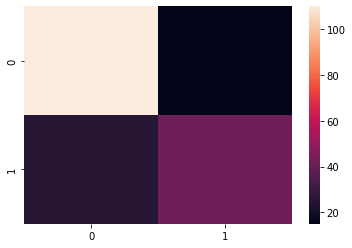

In [139]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix :\n",confusion_matrix(y_test, bag_predict ))
sns.heatmap(confusion_matrix(y_test, bag_predict))


**It is observed when using a Decision tree classifier alone shows around accuracy 70-75% and when trained and tested with bagging classifier gives better accuracy scores. Thus bagging is a definite improvement over the Decision Tree algorithm.**

## 2. SVM model
Here we use scaled data to train the svm model, following to finding the accuracy on training and testing set.

In [35]:
from sklearn.svm import SVC
 
svc = SVC()
svc.fit(scaled_X_train, y_train)

print("Accuracy on training set: {: .2f}".format(svc.score(scaled_X_train, y_train)))
print("Accuracy on test set: {: .2f}".format(svc.score(scaled_X_test, y_test)))

Accuracy on training set:  0.80
Accuracy on test set:  0.78


## Using hyperparameter C

Scaling the data made a huge difference. But now we are actually in an underfitting regime, where training and test set performance are quite similar but less close to 100% accuracy.


**C** is one of the hyper parameters that allows us to control or adds penalty to each misclassifies point. Depending on the value of C, the missclassified point will also be small resulting in larger margin boundry. In other words, C controls tradeoff between smooth decision boundry and classifying training points correctly and thus applying and using it.

In [36]:
# trying C = 5
svc = SVC(C=5)
svc.fit(scaled_X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(scaled_X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(scaled_X_test, y_test)))


Accuracy on training set: 0.83
Accuracy on test set: 0.76


Here we have taken smaller C because it will allow to ignore data point closer to boundary and increases margin.


In [37]:
#Trying C=500
svc = SVC(C=500)
svc.fit(scaled_X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(scaled_X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(scaled_X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.73


When C is greater, there are greater chances for **overfitting**.
* Larger the C, you get better training accuracy but less test accuracy.
* Larger the C, smaller the margin.

### Observation
With Hyperparameter **C** set as 5, it is observed to give better test accuracy.

In [39]:
#Model prediction for each instance of the test.

svm_predict=svc.predict(scaled_X_test)
svm_predict

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

Using confusion matrix to determine and measure the performance of a classifier in depth. 

Confusion matrix consists of:
* True positive (Top left)
* False positive (Top right)
* True negative (Bottom right)
* False negtive (Bottom left)

Confusion matrix:
 [[101  24]
 [ 27  40]]


<AxesSubplot:>

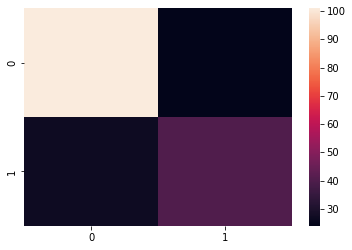

In [41]:
print("Confusion matrix:\n",confusion_matrix(y_test, svm_predict ))
sns.heatmap(confusion_matrix(y_test, svm_predict))

## Grid search
Hyper parameter tuning technique which here is the smart way of finding the optimum value of C and kernel value for the optimum accuracy.

Grid search here is performed in train set and not in test set because we dont want to tune the hyperparameters based on test set.

In [43]:
import multiprocessing
from sklearn.model_selection import GridSearchCV

param_grid = [
                {'kernel':['rbf', 'linear', 'poly', 'sigmoid'],
                'C':[5,10,100,200,300,400,500,600,700,800,900,1000] 
                }
            ]



In [44]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count() )

In [45]:
start= time.process_time()
grid_search.fit(scaled_X_train, y_train)
print("Time taken: ",time.process_time()-start,"seconds")

Time taken:  0.75 seconds


Best model (model with best set of hyper parameters and Kernel)

In [46]:
grid_search.best_estimator_

SVC(C=5, kernel='linear')

The following result shows the best C value among the list and kernel for best prediction along with the best score for the model.



In [48]:
grid_search.best_score_  
#Best score of that model

0.7744706594071386

# Experimentation
### Making a predictive system
Change input data to numpy array because the processing of numpy array is easy and efficent.


Here we have taken one of the example from diabetes.csv value as the input data to test the two models and provide the best prediction possible.

In [49]:
input_data=(4,109,64,44,99,34.8,0.95,26)
input_data_as_numpy_array= np.asarray(input_data)

Reshaping the array as we are predicting for one instance because the model is trained on 768 examples but here we use 1 data.   
The data it conidered the raw data 

In [51]:
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)

#standarising the input data 
std_data = scaler.transform(input_data_reshaped)

print(std_data)
prediction =svc.predict(std_data)
print("Pridiction using SVM:",prediction) #predicting using SVM 
print("------------------------")

prediction2 = bag_model.predict(std_data)
print("Pridiction using Bagging:",prediction2)  #predicting using bagging


#Checks if the patient is Diabetic or Non-diabetic
if (prediction[0]==0 and prediction2[0]==0):
    print("Patient is Non-diabetic")
else:
    print("Patient is Diabetic")

[[0.26666667 0.54773869 0.52459016 0.44444444 0.13306452 0.58585859
  0.37044968 0.09803922]]
Pridiction using SVM: [0]
------------------------
Pridiction using Bagging: [0]
Patient is Non-diabetic


After standardising the input data we get the estimated predicted result of the state of the patient whether the patient is diabetic or non-diabetic by using two well known machine learning algorithms.

### Evaluation and results

### Classification results for SVM

***Terms useful to know***
* Precision: Percentage of correct positive predictions relative to total positive predictions.
* Recall: Percentage of correct positive predictions relative to total actual positives.
* F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.


*To calculate F1 Score:* 

**F1 Score: 2 * (Precision * Recall) / (Precision + Recall)**

Nearer the F1 score is to 1.00 the better accuracy it shows. 

In [53]:
print("Classification Report is:\n",classification_report(y_test,svm_predict))


Classification Report is:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       125
           1       0.62      0.60      0.61        67

    accuracy                           0.73       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.73      0.73       192



As per the following result, it is observed the calculated f1-score trained in an SVM model is 80% for a non-diabetic patient and 61% for a diabetic patient with an accuracy of 73%. 

***This is slighly less accurate than ensemble model tested with the same dataset resulting in lesser chance of overfitting and more time in running process.***

### Advantages of SVM  

* SVM works well when there is a clear margin of separation between the classes.
* It scales relatively well to high dimensional data.
* It is effective in cases where the number of dimensions is greater than the number of samples
* SVM is relatively memory efficeint
* Kernel tricks make SVM to work very efficiently

### Disadvantages of SVM

* SVM algorithm is not suitable for large data sets since it takes long time to train.
* Requires feature scaling
* SVM does not perform very well when the data set has more noise i.e. target classes are overlapping.
* In cases where the number of features for each data point exceeds the number of training data samples, the SVM will underperform.
* As the support vector classifier works by putting data points, above and below the classifying hyperplane there is no probabilistic explanation for the classification.

### Classification results for Ensemble method (Bagging)

In [57]:
print("Classification Report is:\n",classification_report(y_test,bag_predict))


Classification Report is:
               precision    recall  f1-score   support

           0       0.81      0.88      0.85       125
           1       0.74      0.63      0.68        67

    accuracy                           0.79       192
   macro avg       0.78      0.75      0.76       192
weighted avg       0.79      0.79      0.79       192



As per the following result, it is observed the calculated f1-score trained in a ensemble model is 85% for a non-diabetic patient and 68% for a diabetic patient with an accuracy of 79%. 

***This is slighly more accurate than SVM model trained on the same dataset resulting in higher chance of overfitting and comparatively less time in running process.***

### Advantages of Bagging

* One of the biggest advantage is that multiple weak learnes can work better than a single strong learning.
* It helps in reducing variance i.e. overfitting.
* Bagging is stable against noise.
* It provides stability and increases the ML algorithm's accuracy that is used in statistical classification and regression.

### Disadvantages of Bagging
* Bagging needs comparable classifiers
* Since we must use multiple models, it becomes computationally expensive and may not be suitable in various use cases.
* It may result in high bias if it is not modelled properly and thus may result in underfitting.
